In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/SHARED COLAB\ AaronStuff
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/SHARED COLAB AaronStuff'
/content/gdrive/My Drive/Colab Notebooks/COMP5048_Assignment_2


In [14]:
normed_product_data = pd.read_csv("Mobile Device Data for Assignment 2 - Normalized Product Data.csv")
company_id = pd.read_csv("Mobile Device Data for Assignment 2 - Company ID.csv")
model_company = pd.read_csv("Mobile Device Data for Assignment 2 - Model Company.csv")

#K-means of normed_product_data

In [15]:
normed_product_data

,Model,Release Date,Release Year,Model ID,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,Psion Organiser II LZ 64,1/01/1989,1989.000000,1,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,Hewlett-Packard 95LX (HP Jaguar),1/04/1991,1991.250000,2,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,Psion Series 3,1/06/1991,1991.416667,3,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,Hewlett-Packard 95LX 1MB RAM (HP Jaguar),1/01/1992,1992.000000,4,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,Psion Series 3a,1/03/1993,1993.166667,5,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Xiaomi Mi-Two / MI-2,1/12/2012,2012.916667,3158,1.000000,0.249999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3158,Xiaomi Mi-Two / MI-2 32GB,1/12/2012,2012.916667,3159,1.000000,0.499999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3159,ZTE N9120 Avid 4G,1/12/2012,2012.916667,3160,0.249977,0.062080,0.599818,0.165468,0.154472,0.380952,0.160982,0.307377,0.037845,0.011434,0.019397,0.480061
3160,ZTE U930HD,1/12/2012,2012.916667,3161,0.499985,0.062080,0.599818,0.201439,0.252033,0.619048,0.162347,0.344262,0.015394,0.006531,0.011422,0.713781


In [ ]:
cleaned_data = normed_product_data.drop(['Model', 'Release Date','Release Year' , 'Model ID'], axis=1)

In [ ]:
cleaned_data

,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985
...,...,...,...,...,...,...,...,...,...,...,...,...
3157,1.000000,0.249999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3158,1.000000,0.499999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3159,0.249977,0.062080,0.599818,0.165468,0.154472,0.380952,0.160982,0.307377,0.037845,0.011434,0.019397,0.480061
3160,0.499985,0.062080,0.599818,0.201439,0.252033,0.619048,0.162347,0.344262,0.015394,0.006531,0.011422,0.713781


In [ ]:
cleaned_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161
RAM Capacity (Mb),0.000000,0.000214,0.000092,0.000458,0.000214,0.000458,0.000458,0.000275,0.000275,0.000946,0.000946,0.000458,0.000946,0.000458,0.000946,0.000946,0.000946,0.001190,0.000030,0.000214,0.001923,0.000946,0.000946,0.000458,0.001923,0.000946,0.001923,0.001923,0.000946,0.003876,0.001923,0.001434,0.002411,0.000214,0.000458,0.001923,0.005829,0.001923,0.003876,0.001923,...,0.249977,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.249977,0.249977,1.000000,0.499985,0.124973,0.499985,0.499985,0.499985,1.000000,0.499985,1.000000,0.499985,0.499985,0.499985,0.499985,0.499985,1.000000,1.000000,1.000000,0.249977,0.374981,1.000000,1.000000,1.000000,0.499985,0.499985,0.499985,0.499985,1.000000,1.000000,0.249977,0.499985,0.249977
Storage (Mb),0.000000,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000064,0.000064,0.000015,0.000015,0.000064,0.000064,0.000048,0.000130,0.000048,0.000048,0.000130,0.000007,0.000007,0.000064,0.000048,0.000015,0.000015,0.000081,0.000081,0.000081,0.000048,0.000064,0.000064,0.000064,0.000130,0.000130,0.000015,0.000015,0.000064,0.000130,0.000064,0.000163,0.000097,...,0.062080,1.000000,0.249999,0.499999,1.000000,0.249999,0.499999,0.062080,0.016778,0.499999,0.125838,0.062080,0.249999,0.499999,0.125838,0.499999,0.125838,0.499999,0.125838,0.125838,0.249999,0.249999,0.499999,0.499999,0.499999,0.249999,0.033556,0.062080,0.249999,0.499999,0.499999,0.125838,0.125838,0.249999,0.249999,0.249999,0.499999,0.062080,0.062080,0.062080
CPU Clock (MHz),0.000000,0.002230,0.001895,0.002230,0.003386,0.003501,0.003501,0.009548,0.009548,0.003501,0.003501,0.009548,0.009548,0.007547,0.009548,0.003501,0.003501,0.009548,0.007547,0.007547,0.011549,0.007547,0.003386,0.003386,0.021554,0.021554,0.021554,0.003501,0.016051,0.036425,0.019553,0.012049,0.080531,0.007547,0.007547,0.019553,0.036425,0.019553,0.029557,0.008764,...,0.499772,0.649840,0.749886,0.749886,0.799909,0.799909,0.799909,0.499772,0.399726,0.749886,0.755889,0.399726,0.755889,0.755889,0.755889,0.849932,0.755889,0.749886,0.799909,0.749886,0.799909,0.749886,0.755889,0.799909,0.749886,0.799909,0.499772,0.599818,0.699863,0.799909,0.699863,0.755889,0.649840,0.755889,0.599818,0.749886,0.749886,0.599818,0.599818,0.499772
Display Diagonal (in),0.050360,0.223022,0.187050,0.223022,0.258993,0.244604,0.244604,0.251799,0.251799,0.244604,0.244604,0.201439,0.215827,0.143885,0.215827,0.244604,0.244604,0.215827,0.115108,0.115108,0.201439,0.143885,0.258993,0.079137,0.352518,0.352518,0.352518,0.244604,0.244604,0.345324,0.244604,0.366906,0.316547,0.115108,0.115108,0.244604,0.345324,0.244604,0.352518,0.280576,...,0.201439,0.712230,0.215827,0.215827,0.194245,0.194245,0.194245,0.165468,0.165468,0.215827,0.165468,0.165468,0.187050,0.201439,0.165468,0.604317,0.201439,0.230216,0.381295,0.453237,0.453237,0.453237,0.223022,0.273381,0.604317,0.273381,0.136691,0.165468,0.143885,0.223022,0.604317,0.201439,0.604317,0.187050,0.215827,0.187050,0.187050,0.165468,0.201439,0.237410
Display Width(px),0.000000,0.056911,0.056911,0.056911,0.154472,0.219512,0.219512,0.056911,0.056911,0.219512,0.219512,0.056911,0.056911,0.056911,0.056911,0.219512,0.219512,0.056911,0.024390,0.024390,0.219512,0.056911,0.154472,0.056911,0.219512,0.219512,0.219512,0.219512,0.154472,0.219512,0.154472,0.154472,0.089431,0.024390,0.024390,0.154472,0.219512,0.154472,0.219512,0.219512,...,0.178862,0.514634,0.271545,0.271545,0.284553,0.284553,0.284553,0.154472,0.154472,0.252033,0.154472,0.154472,0.154472,0.271545,0.178862,0.739837,0.252033,0.252033,0.375610,0.375610,0.375610,0.375610,0.252033,0.252033,0.514634,0.252033,0.089431,0.154472,0.154472,0.252033,0.479675,0.252033,0.479675,0.252033,0.178862,0.252033,0.252033,0.154

In [ ]:
features = ['RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density']
input_data = np.array(cleaned_data.T)
input_data.shape

(12, 3162)

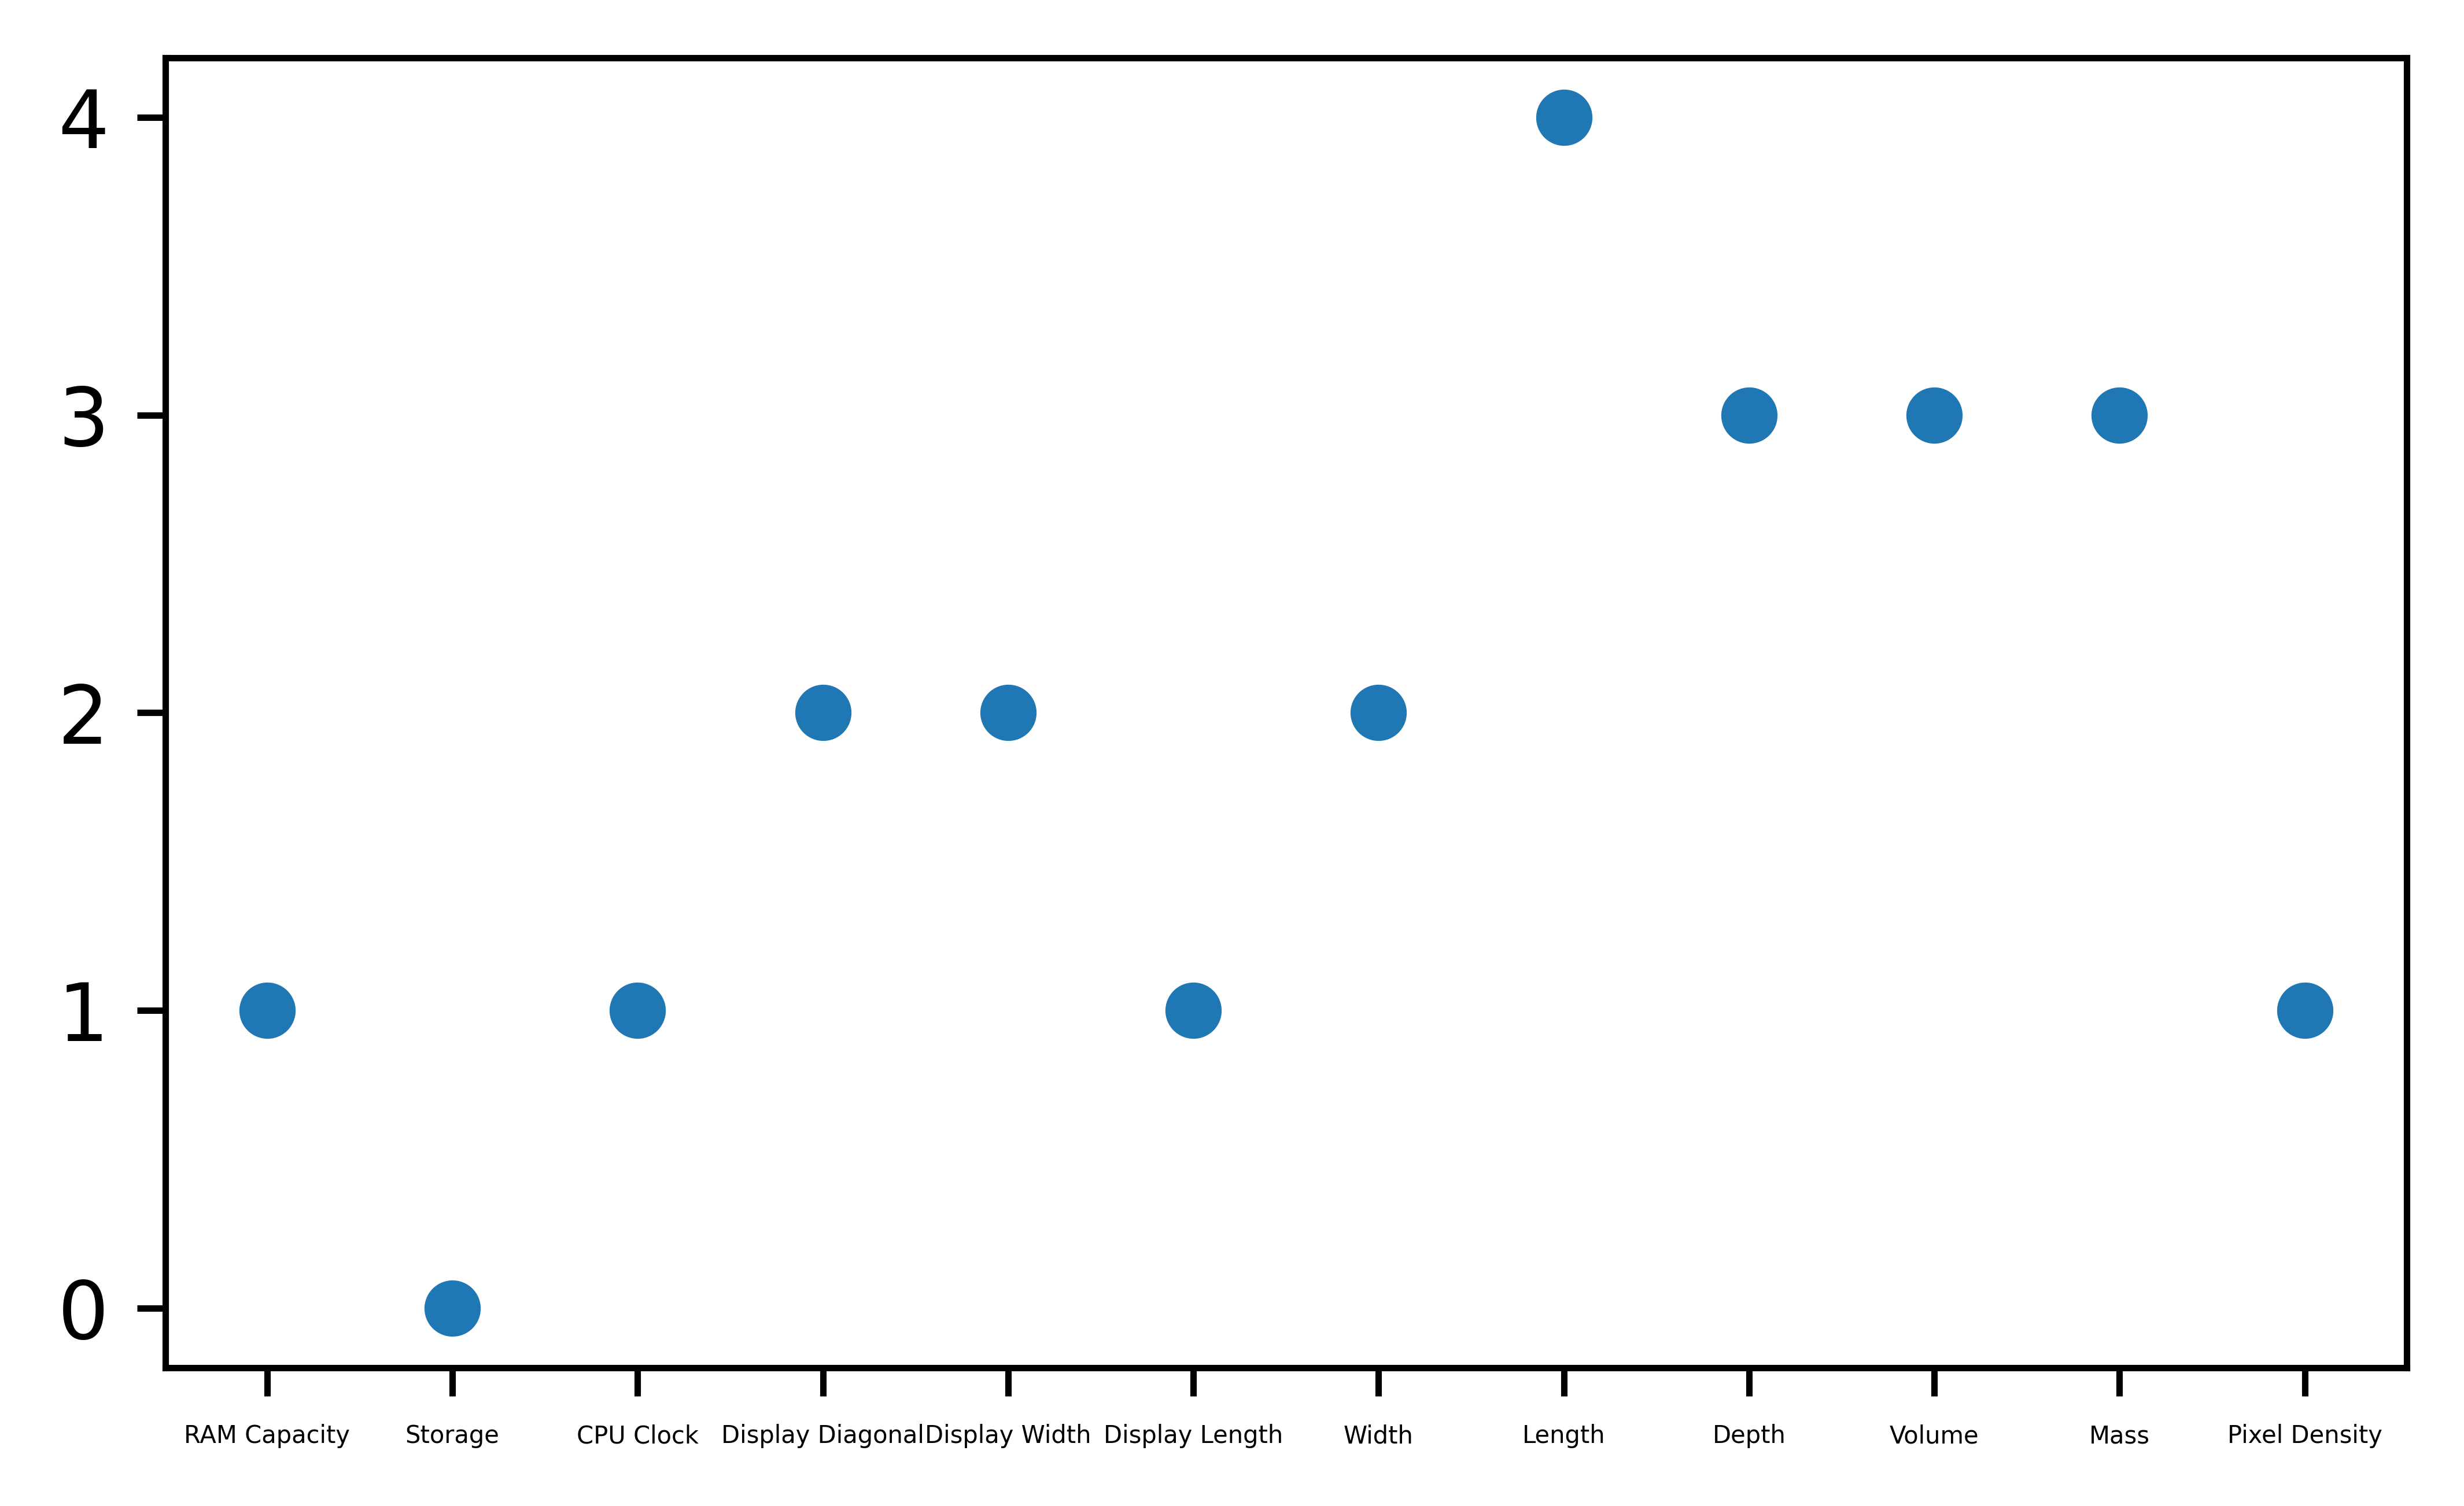

In [ ]:
kmeans = KMeans(5, random_state=0)
kmeans.fit(input_data)   # 训练模型
labels = kmeans.predict(input_data) 
plt.figure(figsize=(5,3))
plt.scatter(features, labels)
plt.xticks(fontsize=3)
plt.show()

In [ ]:
pca_data = input_data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(pca_data)
features = X_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = data['company']
res.head()

(1.0000000000000002-3.851859888774472e-33j) 
 [(0.6435162347282741+4.415000627746515e-34j), (0.16244605797137796+1.1145009390810776e-34j), (0.08306034258035241+5.698558091357884e-35j), (0.045190270334972665+3.100389098671064e-35j), (0.02471904835023369+1.69591081147565e-35j), (0.015485086142286294+1.06239223424986e-35j), (0.011804307188994155+8.09863385521703e-36j), (0.0068087043468078+4.671278258891159e-36j), (0.003477267029562947+2.3856641510909417e-36j), (0.002061289306600134+1.414197978462737e-36j), (0.0014313920205379757+9.820415287416916e-37j), (-4.689743997561321e-17-3.2175136501329296e-50j), (2.824797950920886e-17+2.8832004629743866e-18j), (2.824797950920886e-17-2.8832004629743866e-18j), (2.345609373733844e-18+2.832349247559874e-17j), (2.345609373733844e-18-2.832349247559874e-17j), (8.1268113444355e-18+2.7145939643531443e-17j), (8.1268113444355e-18-2.7145939643531443e-17j), (2.426939818196105e-17+1.0047553826323774e-17j), (2.426939818196105e-17-1.0047553826323774e-17j), (-2.557

KeyError: ignored

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

##Drop 'Model', 'Release Date','Release Year' , 'Model ID', 'Display Width(px)', 'Display Length(px)', 'Width (mm)', 'Length (mm)', 'Depth (mm)'

In [ ]:
drop_redundant_data = normed_product_data.drop(['Model', 'Release Date','Release Year' , 'Model ID', 'Display Width(px)', 'Display Length(px)', 'Width (mm)', 'Length (mm)', 'Depth (mm)'], axis=1)
drop_redundant_features = ['RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Volume', 'Mass', 'Pixel Density']
drop_redundant_input = np.array(drop_redundant_data.T)
drop_redundant_input.shape

(7, 3162)

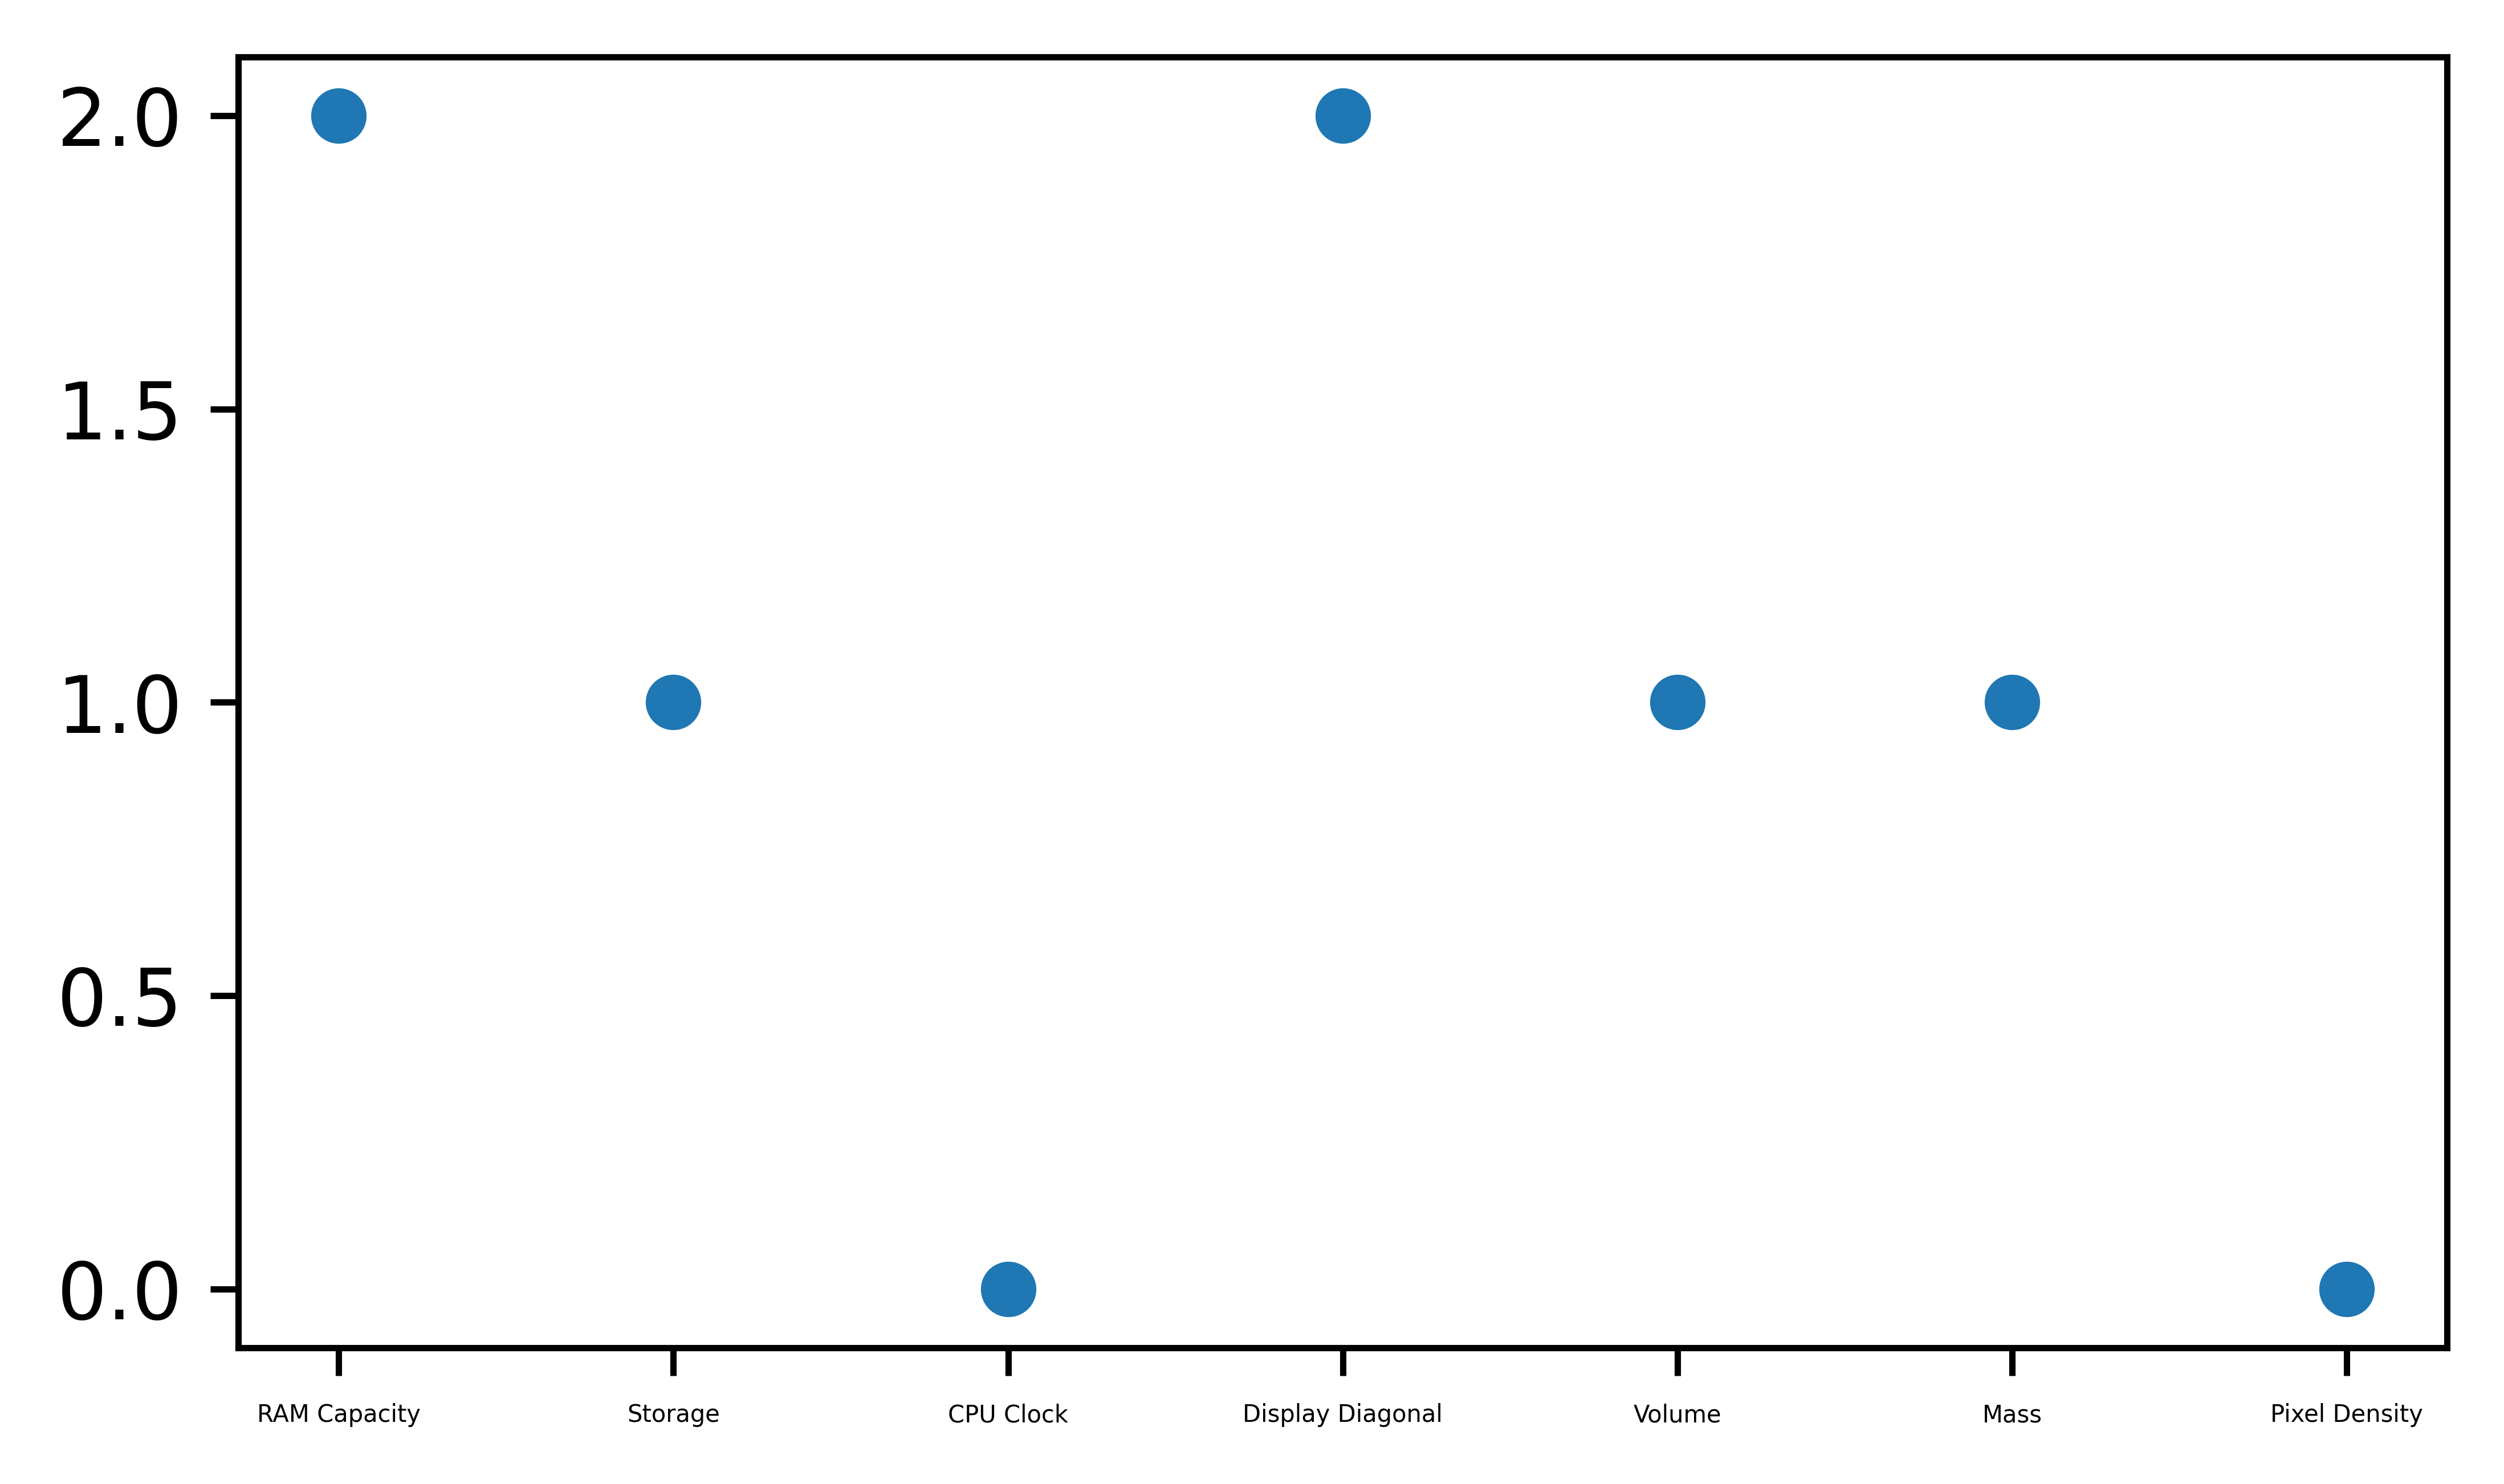

In [ ]:
kmeans = KMeans(3)
kmeans.fit(drop_redundant_input)   # 训练模型
labels = kmeans.predict(drop_redundant_input) 
plt.figure(figsize=(5,3))
plt.scatter(drop_redundant_features, labels)
plt.xticks(fontsize=3)
plt.show()

#Scatter plot for company vs count model number

In [ ]:
company_id=company_id[company_id.index%2==1]
company_id.index = range(len(company_id))
company_id

,Old_ID,Company,Company_real,New_ID
0,1.0,1und1,United Internet,141.0
1,2.0,3Com,3Com,1.0
2,3.0,Abocom,AboCom Systems,2.0
3,4.0,Acer,Acer,3.0
4,5.0,Ainol,"Shenzhen Ainol Electronics Co., Ltd",116.0
...,...,...,...,...
208,209.0,Zenum,Zenum,153.0
209,210.0,Ziss,Ziss HongKong,154.0
210,211.0,Zopo,Zopo Mobile,155.0
211,212.0,ZTE,ZTE,156.0


In [ ]:
model_company = model_company[model_company.index%2==1]
model_company.index = range(len(model_company))
model_company

,Model,Release Date,Release Year,Model ID,Company_ID
0,Casio Cassiopeia E-3000,1/01/2003,2003.000000,260.0,26.0
1,Coxion WebBook Mobile Computer,1/01/2003,2003.000000,261.0,35.0
2,CyberBank POZ 0850,1/01/2003,2003.000000,262.0,61.0
3,Medion MDPPC 100 (MD7200),1/01/2003,2003.000000,263.0,84.0
4,MiTAC Mio 728 PDA Phone,1/01/2003,2003.000000,264.0,84.0
...,...,...,...,...,...
2898,Xiaomi Mi-Two / MI-2,1/12/2012,2012.916667,3158.0,149.0
2899,Xiaomi Mi-Two / MI-2 32GB,1/12/2012,2012.916667,3159.0,149.0
2900,ZTE N9120 Avid 4G,1/12/2012,2012.916667,3160.0,156.0
2901,ZTE U930HD,1/12/2012,2012.916667,3161.0,156.0


In [ ]:
Company_ID_ls = set(model_company['Company_ID'])
Company_ID_ls = list(Company_ID_ls)
Company_ID_ls.sort()
Company_ID_ls = np.array(Company_ID_ls)
Company_model_count = np.zeros(Company_ID_ls.shape)
for i in np.arange(len(Company_ID_ls)):
  for id in model_company['Company_ID']:
    if id == Company_ID_ls[i]:
      Company_model_count[i] += 1

In [ ]:
Company_ID_ls[145]

213.0

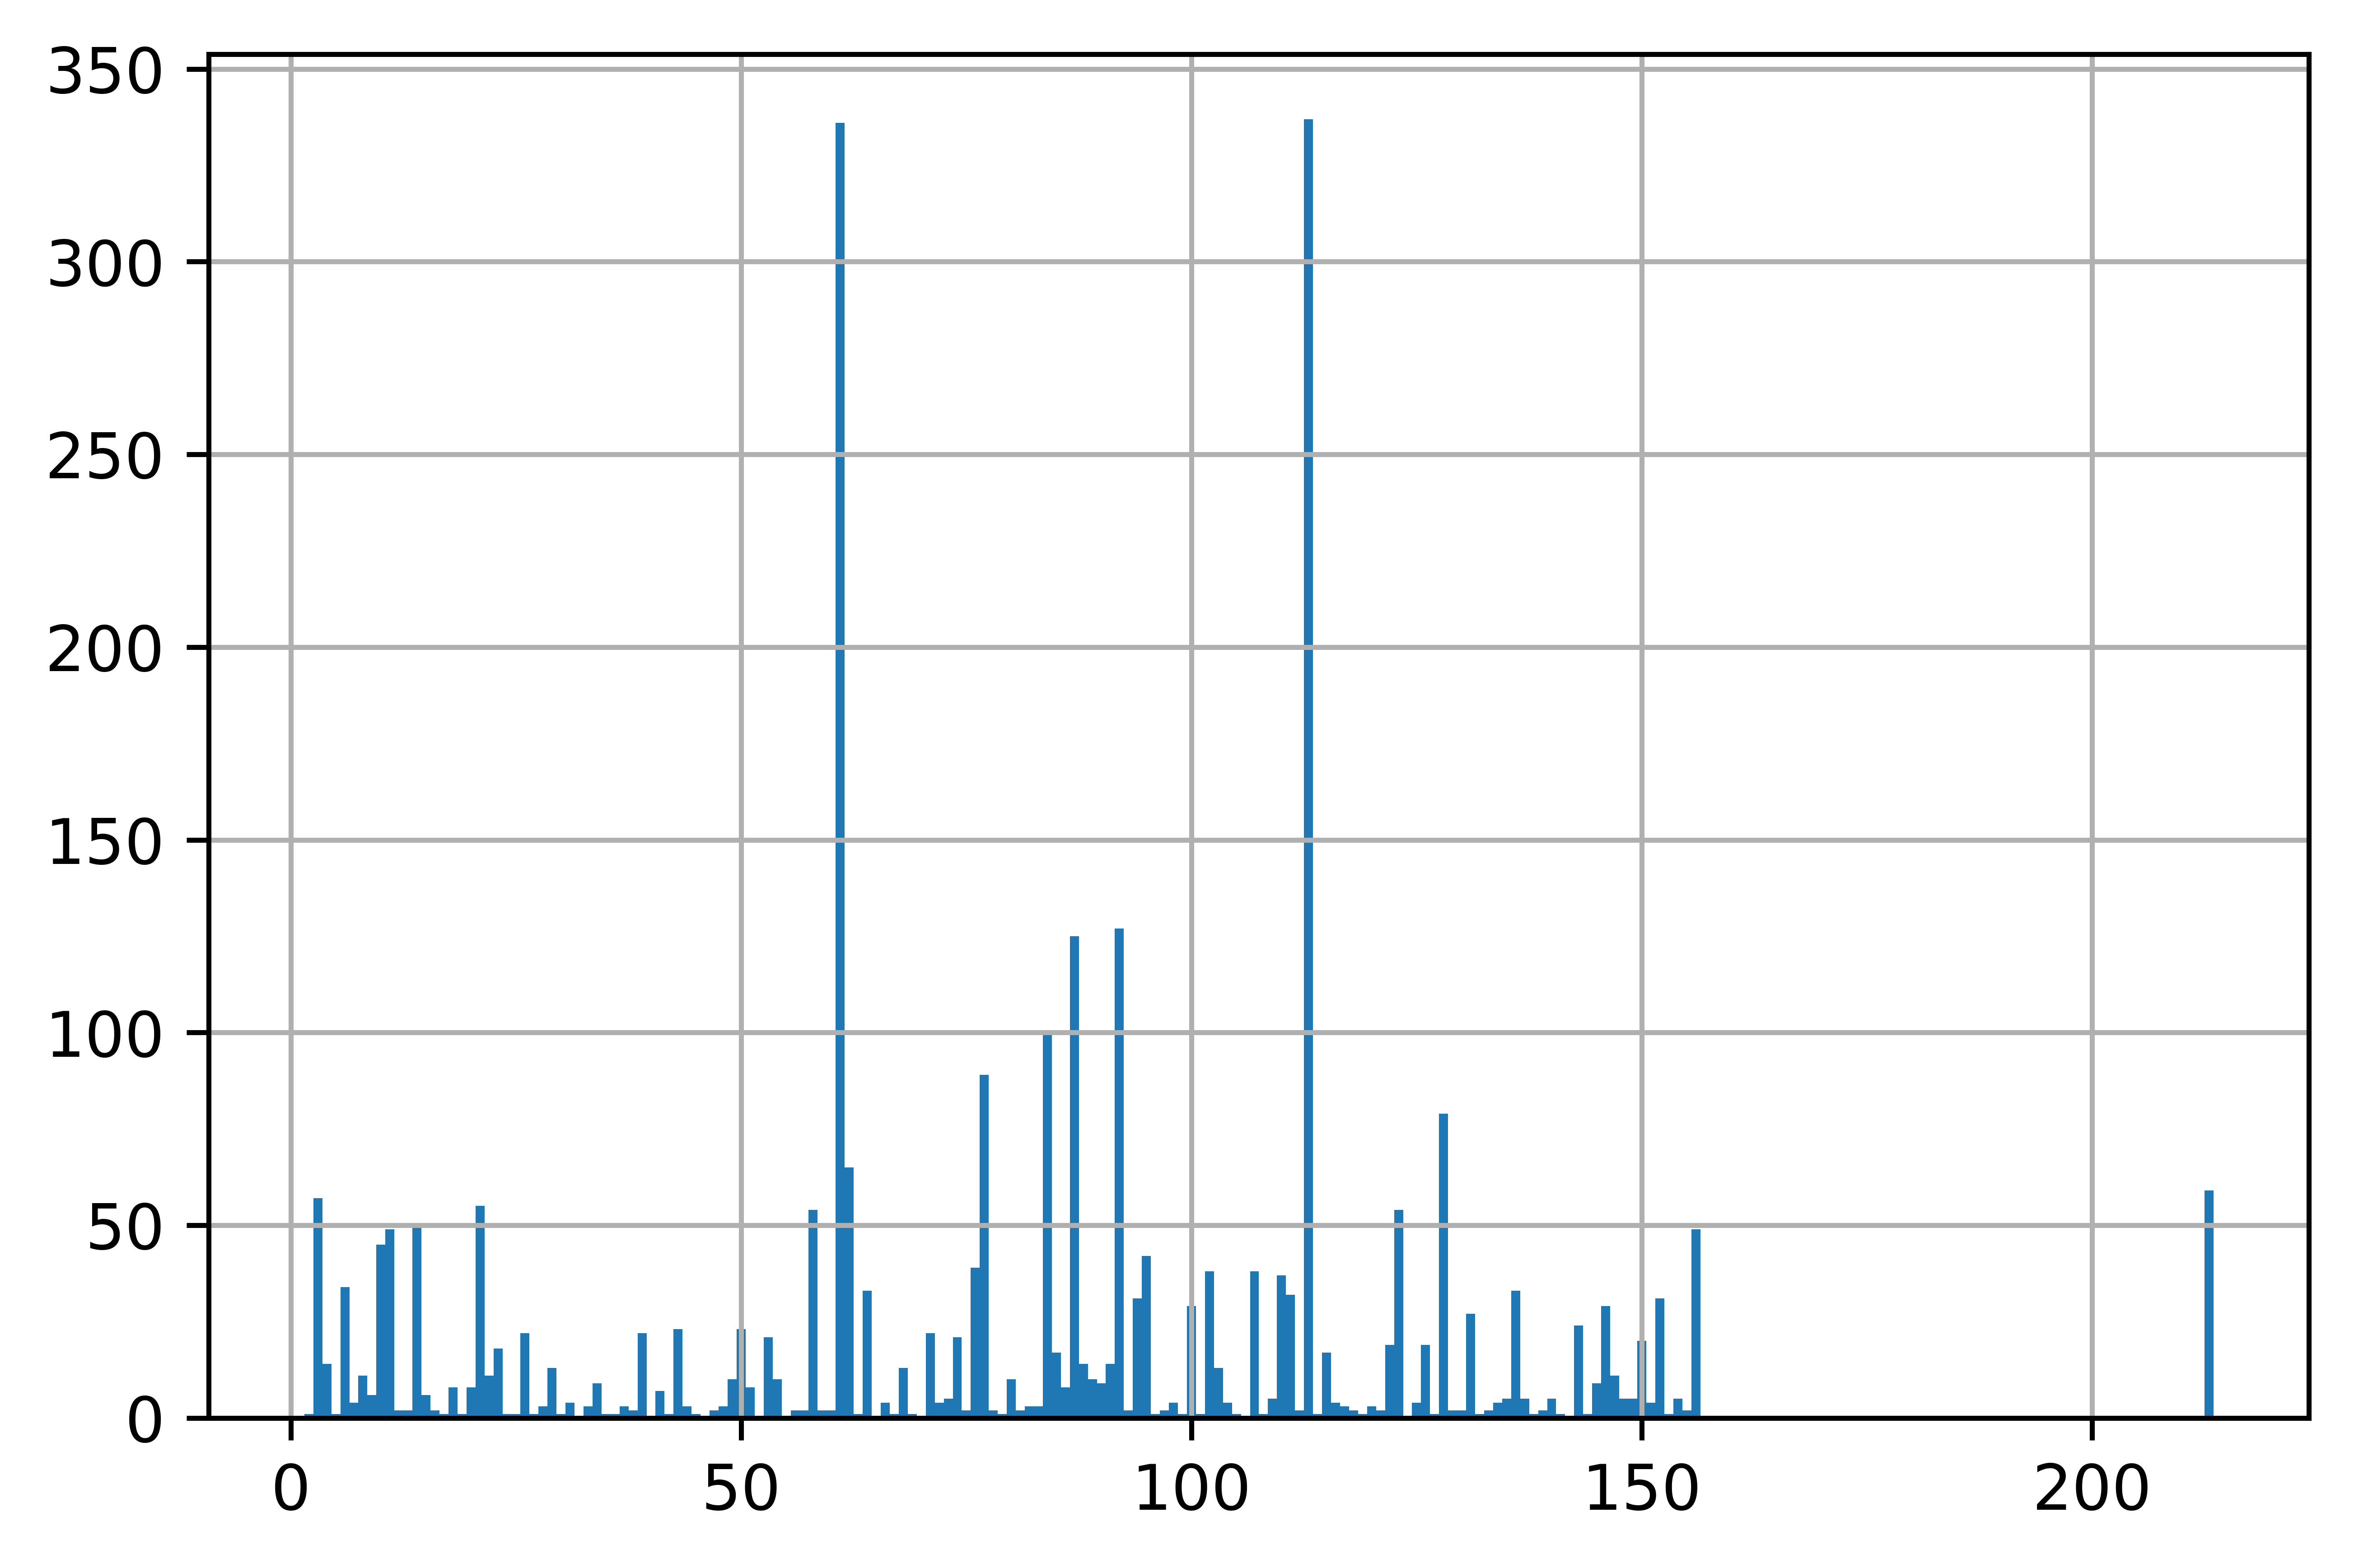

In [ ]:
plt.bar(Company_ID_ls, Company_model_count, width = 1)
plt.grid()
plt.show()

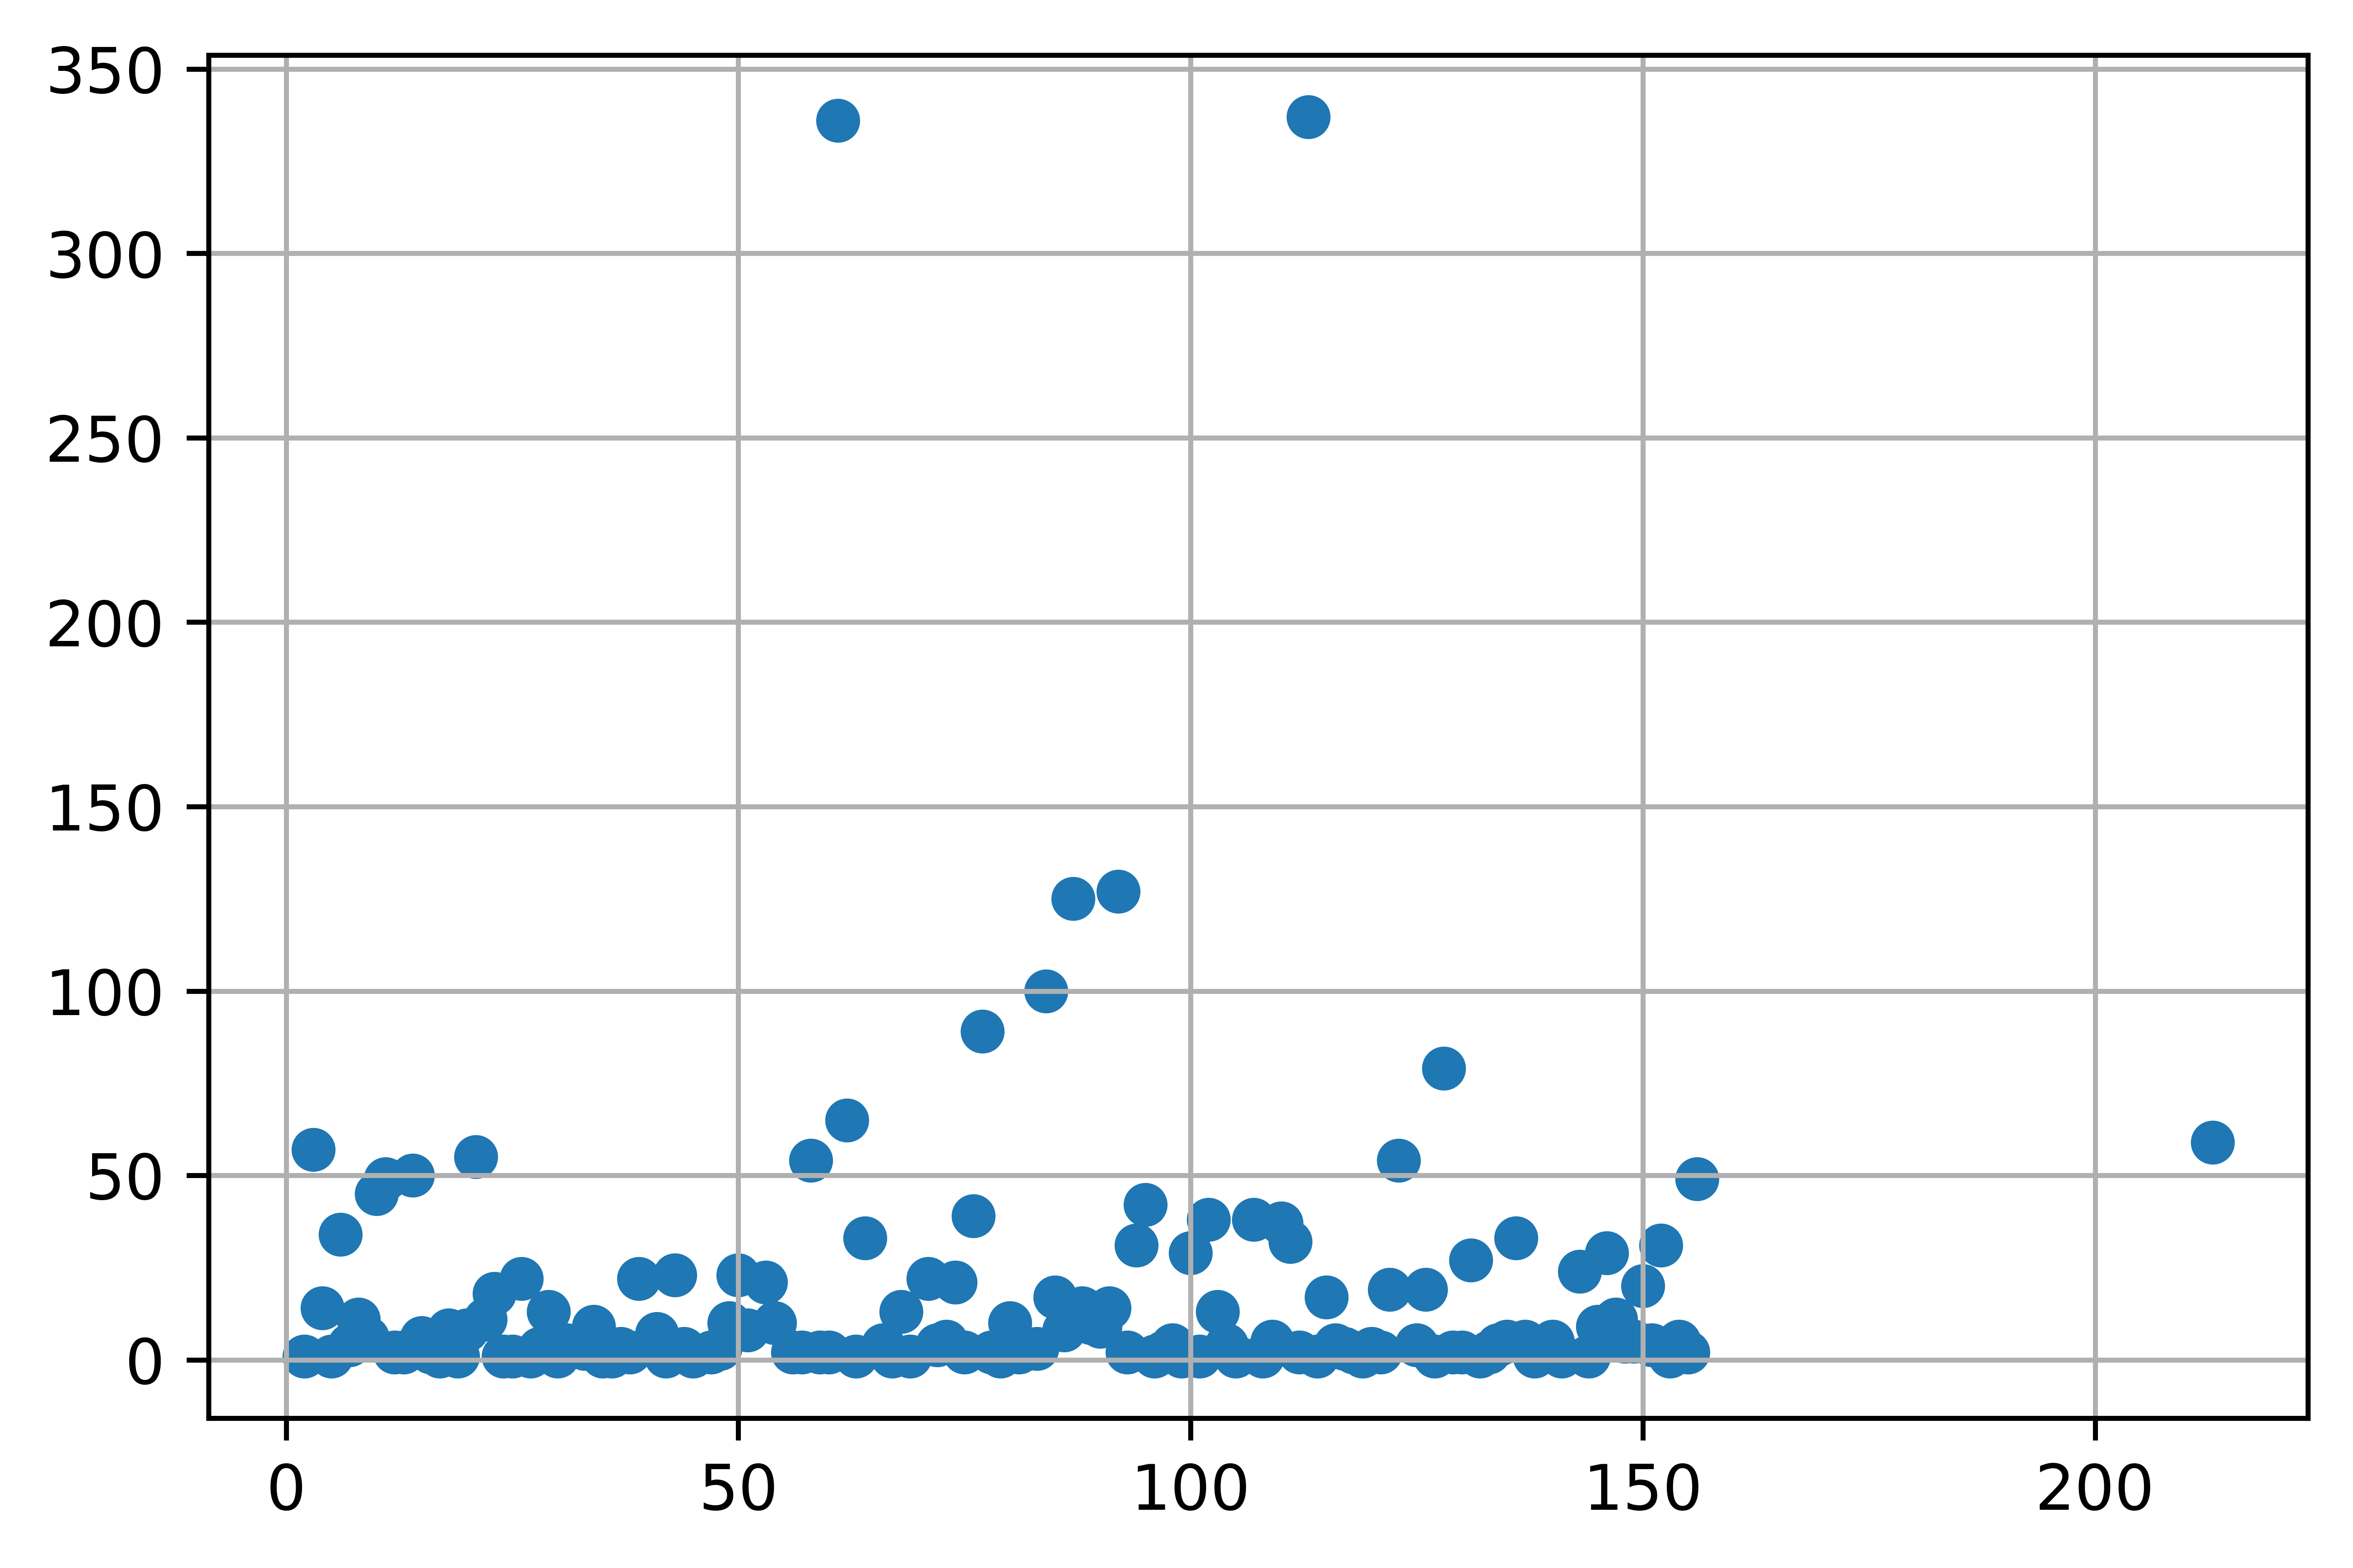

In [ ]:
plt.scatter(Company_ID_ls, Company_model_count)
plt.grid()
plt.show()

#Others

In [ ]:
normed_product_data

,Model,Release Date,Release Year,Model ID,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,Psion Organiser II LZ 64,1/01/1989,1989.000000,1,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,Hewlett-Packard 95LX (HP Jaguar),1/04/1991,1991.250000,2,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,Psion Series 3,1/06/1991,1991.416667,3,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,Hewlett-Packard 95LX 1MB RAM (HP Jaguar),1/01/1992,1992.000000,4,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,Psion Series 3a,1/03/1993,1993.166667,5,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Xiaomi Mi-Two / MI-2,1/12/2012,2012.916667,3158,1.000000,0.249999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3158,Xiaomi Mi-Two / MI-2 32GB,1/12/2012,2012.916667,3159,1.000000,0.499999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3159,ZTE N9120 Avid 4G,1/12/2012,2012.916667,3160,0.249977,0.062080,0.599818,0.165468,0.154472,0.380952,0.160982,0.307377,0.037845,0.011434,0.019397,0.480061
3160,ZTE U930HD,1/12/2012,2012.916667,3161,0.499985,0.062080,0.599818,0.201439,0.252033,0.619048,0.162347,0.344262,0.015394,0.006531,0.011422,0.713781


In [ ]:
#drop unwanted data
new_data = normed_product_data.drop(['Model', 'Release Date', 'Model ID'], axis=1)
new_data

,Release Year,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,1989.000000,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,1991.250000,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,1991.416667,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,1992.000000,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,1993.166667,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,2012.916667,1.000000,0.249999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3158,2012.916667,1.000000,0.499999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3159,2012.916667,0.249977,0.062080,0.599818,0.165468,0.154472,0.380952,0.160982,0.307377,0.037845,0.011434,0.019397,0.480061
3160,2012.916667,0.499985,0.062080,0.599818,0.201439,0.252033,0.619048,0.162347,0.344262,0.015394,0.006531,0.011422,0.713781


In [ ]:
#normalize release year
delta = max(new_data["Release Year"]) - min(new_data["Release Year"])
min_data = min(new_data["Release Year"])
for i in range(len(new_data["Release Year"])):
  new_data.iloc[i, 0] = (new_data["Release Year"][i] - min_data) / delta

In [ ]:
new_data

,Release Year,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,0.000000,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,0.094077,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,0.101045,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,0.125436,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,0.174216,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,1.000000,1.000000,0.249999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3158,1.000000,1.000000,0.499999,0.749886,0.187050,0.252033,0.619048,0.151432,0.315574,0.026299,0.007623,0.018319,0.751641
3159,1.000000,0.249977,0.062080,0.599818,0.165468,0.154472,0.380952,0.160982,0.307377,0.037845,0.011434,0.019397,0.480061
3160,1.000000,0.499985,0.062080,0.599818,0.201439,0.252033,0.619048,0.162347,0.344262,0.015394,0.006531,0.011422,0.713781


In [ ]:
count=1
plt.subplots(figsize=(20, 20))
for i in new_data.columns[1:]: 
  plt.subplot(4,4,count)
  sns.scatterplot(new_data["Release Year"], new_data[i], color = 'red' )
  count+=1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


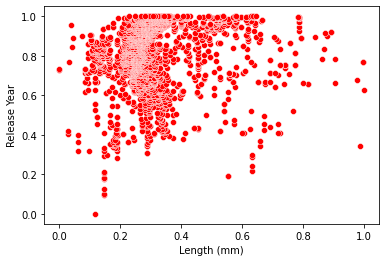

In [ ]:
sns.scatterplot(new_data["Length (mm)"],new_data["Release Year"], color = 'red' )
plt.show()

In [ ]:
count=1
plt.subplots(figsize=(20, 20))
for i in new_data.columns[1:]: 
  plt.subplot(4,4,count)
  sns.scatterplot(new_data[i], new_data[i], color = 'red' )
  count+=1
plt.show()

Output hidden; open in https://colab.research.google.com to view.